### Classification Exercises

The end product of these exercise is a jupyter notebook (classification_exercises.ipynb) and a acquire.py file. The notebook will contain all your work as you move through the exercises. The acquire.py file should contain the final functions that acquire the data into a pandas dataframe.

1. Make a new repo called classification-exercises on both GitHub and within your codeup-data-science directory. This will be where you do your work for this module.
2. Inside of your local classification-exercises repo, create a file named .gitignore and list the following file names and paths: env.py, .DS_Store, .ipynb_checkpoints/, $__pycache__$, titanic.csv, iris.csv, and telco.csv. Add and commit your .gitignore file before moving forward.
3. Now that you are 100% sure that your .gitignore file lists env.py, create or copy your env.py file inside of classification-exercises. Running git status should show that git is ignoring this file.
4. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.
 - print the first 3 rows
 - print the number of rows and columns (shape)
 - print the column names
 - print the data type of each column
 - print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [287]:
from pydataset import data
import pandas as pd
import numpy as np
import os
import seaborn as sns
from scipy import stats
from env import host, user, password

In [2]:
df_iris = data('iris')
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [4]:
df_iris.shape

(150, 5)

In [17]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [8]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [60]:
stats = df_iris.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [62]:
stats['range'] = stats['max'] - stats['min']
stats

,count,mean,std,min,25%,50%,75%,max,range
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9,3.6
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4,2.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9,5.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5,2.4


5. Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.
 - assign the first 100 rows to a new dataframe, df_excel_sample
 - print the number of rows of your original dataframe
 - print the first 5 column names
 - print the column names that have a data type of object
 - compute the range for each of the numeric variables.

In [24]:
df_excel = pd.read_excel('Excel_Exercises.xlsx', 'Table1_CustDetails')
df_excel.head(3)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes


In [25]:
df_excel_sample = df_excel.iloc[:100]
df_excel_sample.shape, df_excel.shape

((100, 12), (7049, 12))

In [32]:
list(df_excel.columns)[0:5]

['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents']

In [39]:
list(df_excel.select_dtypes(include = 'object').columns)

['customer_id', 'gender', 'partner', 'dependents', 'payment_type', 'churn']

In [37]:
df_excel.describe()

,is_senior_citizen,phone_service,internet_service,contract_type,monthly_charges,total_charges
count,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7038.000000
mean,0.162009,1.324585,1.222585,0.690878,64.747014,2283.043883
std,0.368485,0.642709,0.779068,0.833757,30.099460,2266.521984
min,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,1.000000,1.000000,0.000000,35.450000,401.587500
50%,0.000000,1.000000,1.000000,0.000000,70.350000,1397.100000
75%,0.000000,2.000000,2.000000,1.000000,89.850000,3793.775000
max,1.000000,2.000000,2.000000,2.000000,118.750000,8684.800000


In [40]:
df_excel_numeric = df_excel.select_dtypes(include = 'float64')
df_excel_numeric.head(3)

,monthly_charges,total_charges
0,65.6,593.30
1,59.9,542.40
2,73.9,280.85


In [41]:
print('The range for the monthly_charges column is: ', df_excel_numeric.monthly_charges.max() - df_excel_numeric.monthly_charges.min())
print('The range for the total_charges column is: ', df_excel_numeric.total_charges.max() - df_excel_numeric.total_charges.min())

The range for the monthly_charges column is:  100.5
The range for the total_charges column is:  8666.0


6. Read the data from [this google sheet](https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit?usp=sharing) into a dataframe, `df_google`
 - print the first 3 rows
 - print the number of rows and columns
 - print the column names
 - print the data type of each column
 - print the summary statistics for each of the numeric variables
 - print the unique values for each of your categorical variables

In [45]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit?usp=sharing'
google_url = sheet_url.replace('/edit?usp=sharing', '/export?format=csv')
df_google = pd.read_csv(google_url)
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [46]:
df_google.shape

(891, 12)

In [47]:
list(df_google.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [48]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [63]:
df_google.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [53]:
df_google.select_dtypes(include = 'object').columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [54]:
df_google_categorical = df_google.select_dtypes(include = 'object')
df_google_categorical.Name.value_counts()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S


In [55]:
df_google_categorical.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [56]:
df_google_categorical.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [57]:
df_google_categorical.Cabin.value_counts()

B96 B98            4
G6                 4
C23 C25 C27        4
C22 C26            3
F33                3
F2                 3
E101               3
D                  3
C78                2
C93                2
E8                 2
D36                2
B77                2
C123               2
E121               2
E44                2
D35                2
C125               2
E67                2
B35                2
B18                2
E24                2
B49                2
C65                2
B20                2
B5                 2
B57 B59 B63 B66    2
C126               2
B51 B53 B55        2
F4                 2
C124               2
F G73              2
B58 B60            2
C52                2
D33                2
C68                2
D20                2
D26                2
B28                2
C83                2
E25                2
D17                2
B22                2
C92                2
C2                 2
E33                2
C70                1
E58          

In [58]:
df_google_categorical.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [64]:
for col in df_google.columns:
    if df_google[col].dtypes == 'object':
        print(f'{col} has {df_google[col].nunique()} unique values.')

Name has 891 unique values.
Sex has 2 unique values.
Ticket has 681 unique values.
Cabin has 147 unique values.
Embarked has 3 unique values.


### Data Preparation Exercises

The end product of this exercise should be the specified functions in a python script named prepare.py. Do these in your classification_exercises.ipynb first, then transfer to the prepare.py file.

This work should all be saved in your local classification-exercises repo. Then add, commit, and push your changes.

Using the Iris Data:

1. Use the function defined in acquire.py to load the iris data.

In [134]:
df_iris = data('iris')
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


2. Drop the species_id and measurement_id columns.

In [ ]:
#df_iris = df_iris.drop(columns = 'species_id')

3. Rename the species_name column to just species.

In [66]:
df_iris = df_iris.rename(columns = {'Species': 'species_name'})
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,species_name
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


4. Create dummy variables of the species name and concatenate onto the iris dataframe.

In [70]:
df_iris_dummy = pd.get_dummies(df_iris['species_name'])
df_iris = pd.concat([df_iris, df_iris_dummy], axis = 1)
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,species_name,setosa,versicolor,virginica
1,5.1,3.5,1.4,0.2,setosa,1,0,0
2,4.9,3.0,1.4,0.2,setosa,1,0,0
3,4.7,3.2,1.3,0.2,setosa,1,0,0


5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [77]:
def prep_iris(df):
    df_iris = df_iris.drop(columns = 'species_id')
    df_iris = df_iris.rename(columns = {'Species': 'species_name'})
    df_iris_dummy = pd.get_dummies(df_iris['species_name'])
    df_iris = pd.concat([df_iris, df_iris_dummy], axis = 1)
    return df_iris

In [180]:
def split_iris(df):
    train_validate, test = train_test_split(df, test_size = .2, random_state = 123, stratify = df.species_name)
    train, validate = train_test_split(train_validate, 
                                       test_size = .3, 
                                       random_state = 123, 
                                       stratify = train_validate.species_name)
    return train, validate, test  

Using the Titanic dataset

1. Use the function defined in acquire.py to load the Titanic data.

In [74]:
###################### Acquire Titanic Data ######################

def get_connection(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    It takes in a string name of a database as an argument.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    
def new_titanic_data():
    '''
    This function reads the titanic data from the Codeup db into a df,
    write it to a csv file, and returns the df.
    '''
    # Create SQL query.
    sql_query = 'SELECT * FROM passengers'
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('titanic_db'))
    
    return df

def get_titanic_data():
    '''
    This function reads in titanic data from Codeup database, writes data to
    a csv file if a local file does not exist, and returns a df.
    '''
    if os.path.isfile('titanic_df.csv'):
        
        # If csv file exists, read in data from csv file.
        df = pd.read_csv('titanic_df.csv', index_col=0)
        
    else:
        
        # Read fresh data from db into a DataFrame.
        df = new_titanic_data()
        
        # Write DataFrame to a csv file.
        df.to_csv('titanic_df.csv')
        
    return df

In [75]:
df_titanic = get_titanic_data()
df_titanic.head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1


2. Drop any unnecessary, unhelpful, or duplicated columns.

In [76]:
df_titanic = df_titanic.drop(columns = ['deck', 'embarked', 'class', 'age'])

3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [84]:
df_titanic_dummy = pd.get_dummies(df_titanic[['sex', 'embark_town']], dummy_na = False, drop_first = [True, True])
df_titanic = pd.concat([df_titanic, df_titanic_dummy], axis = 1)
df_titanic.head(3)   

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1


4. Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [ ]:
def prep_titanic():
    df_titanic = get_titanic_data()
    df_titanic = df_titanic.drop(columns = ['deck', 'embarked', 'class', 'age'])
    df_titanic_dummy = pd.get_dummies(df_titanic[['sex', 'embark_town']], dummy_na = False, drop_first = [True, True])
    df_titanic = pd.concat([df_titanic, df_titanic_dummy], axis = 1)
    return df_titanic

In [ ]:
def split_titanic(df):
    train_validate, test = train_test_split(df, test_size = .2, random_state = 123, stratify = df.survived)
    train, validate = train_test_split(train_validate, 
                                       test_size = .3, 
                                       random_state = 123, 
                                       stratify = train_validate.survived)
    return train, validate, test  

Using the Telco dataset

1. Use the function defined in acquire.py to load the Telco data.

In [85]:
def new_telco_data():
    '''
    This function reads the iris data from the Codeup db into a df.
    '''
    sql_query = """
                select * from customers
                join contract_types using (contract_type_id)
                join internet_service_types using (internet_service_type_id)
                join payment_types using (payment_type_id)
                """
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('telco_churn'))
    
    return df

def get_telco_data():
    '''
    This function reads in iris data from Codeup database, writes data to
    a csv file if a local file does not exist, and returns a df.
    '''
    if os.path.isfile('telco.csv'):
        
        # If csv file exists read in data from csv file.
        df = pd.read_csv('telco.csv', index_col=0)
        
    else:
        
        # Read fresh data from db into a DataFrame
        df = new_telco_data()
        
        # Cache data
        df.to_csv('telco.csv')
        
    return df

In [139]:
df_telco = get_telco_data()
df_telco.head().T

,0,1,2,3,4
customer_id,0016-QLJIS,0017-DINOC,0019-GFNTW,0056-EPFBG,0078-XZMHT
gender,Female,Male,Female,Male,Male
senior_citizen,0,0,0,0,0
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,Yes,No
tenure,65,54,56,20,72
phone_service,Yes,No,No,No,Yes
multiple_lines,Yes,No phone service,No phone service,No phone service,Yes
internet_service_type_id,1,1,1,1,1
online_security,Yes,Yes,Yes,Yes,No


In [151]:
df_telco = df_telco.replace(r'^\s*$', np.nan, regex = True)
df_telco.total_charges = df_telco.total_charges.astype('float64')

In [152]:
df_telco['average_charges'] = df_telco.total_charges/df_telco.tenure
df_telco.average_charges.describe()

count    7032.000000
mean       64.799424
std        30.185891
min        13.775000
25%        36.179891
50%        70.373239
75%        90.179560
max       121.400000
Name: average_charges, dtype: float64

In [156]:
df_telco[df_telco.total_charges == 0].T

,85,156,236,255,339,5681,5717,5727,5798,6007,6257
customer_id,1371-DWPAZ,2775-SEFEE,4075-WKNIU,4472-LVYGI,5709-LVOEQ,2520-SGTTA,3115-CZMZD,3213-VVOLG,4367-NUYAO,7644-OMVMY,2923-ARZLG
gender,Female,Male,Female,Female,Female,Female,Male,Male,Male,Male,Male
senior_citizen,0,0,0,0,0,0,0,0,0,0,0
partner,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes
dependents,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
tenure,0,0,0,0,0,0,0,0,0,0,0
phone_service,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes
multiple_lines,No phone service,Yes,Yes,No phone service,No,No,No,Yes,Yes,No,No
internet_service_type_id,1,1,1,1,1,3,3,3,3,3,3
online_security,Yes,Yes,No,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service


In [153]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 7043 non-null   object 
 1   gender                      7043 non-null   object 
 2   senior_citizen              7043 non-null   int64  
 3   partner                     7043 non-null   object 
 4   dependents                  7043 non-null   object 
 5   tenure                      7043 non-null   int64  
 6   phone_service               7043 non-null   object 
 7   multiple_lines              7043 non-null   object 
 8   internet_service_type_id    7043 non-null   int64  
 9   online_security             7043 non-null   object 
 10  online_backup               7043 non-null   object 
 11  device_protection           7043 non-null   object 
 12  tech_support                7043 non-null   object 
 13  streaming_tv                7043 

2. Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [132]:
df_telco = df_telco.drop(columns = ['contract_type_id.1', 'internet_service_type_id.1', 'payment_type_id.1'])
df_telco.head().T

,0,1,2,3,4
customer_id,0016-QLJIS,0017-DINOC,0019-GFNTW,0056-EPFBG,0078-XZMHT
gender,Female,Male,Female,Male,Male
senior_citizen,0,0,0,0,0
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,Yes,No
tenure,65,54,56,20,72
phone_service,Yes,No,No,No,Yes
multiple_lines,Yes,No phone service,No phone service,No phone service,Yes
internet_service_type_id,1,1,1,1,1
online_security,Yes,Yes,Yes,Yes,No


3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [133]:
df_telco_dummy = pd.get_dummies(df_telco[['contract_type', 'internet_service_type', 'payment_type']], dummy_na = False, drop_first = [True, True])
df_telco = pd.concat([df_telco, df_telco_dummy], axis = 1)
df_telco.head().T   

,0,1,2,3,4
customer_id,0016-QLJIS,0017-DINOC,0019-GFNTW,0056-EPFBG,0078-XZMHT
gender,Female,Male,Female,Male,Male
senior_citizen,0,0,0,0,0
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,Yes,No
tenure,65,54,56,20,72
phone_service,Yes,No,No,No,Yes
multiple_lines,Yes,No phone service,No phone service,No phone service,Yes
internet_service_type_id,1,1,1,1,1
online_security,Yes,Yes,Yes,Yes,No


4. Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [ ]:
def prep_telco():
    df_telco = get_telco_data()
    df_telco = df_telco.replace(r'^\s*$', np.nan, regex = True)
    df_telco.total_charges = df_telco.total_charges.astype('float64')
    df_telco = df_telco.drop(columns = ['contract_type_id.1', 'internet_service_type_id.1', 'payment_type_id.1'])
    df_telco_dummy = pd.get_dummies(df_telco[['contract_type', 'internet_service_type', 'payment_type']], dummy_na = False, drop_first = [True, True])
    df_telco = pd.concat([df_telco, df_telco_dummy], axis = 1)
    
    return df_telco

In [ ]:
def split_telco(df):
    train_validate, test = train_test_split(df, test_size = .2, random_state = 123, stratify = df.churn)
    train, validate = train_test_split(train_validate, 
                                       test_size = .3, 
                                       random_state = 123, 
                                       stratify = train_validate.churn)
    return train, validate, test  

### Exploratory Analysis Exercises

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# import our own acquire module
import acquire

# Remove limits on viewing dataframes
pd.set_option('display.max_columns', None)

Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

Acquire, prepare & split your data.

In [173]:
def get_connection(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    
def iris_data():
    '''
    This function reads the titanic data from the Codeup db into a df.
    '''
    # Create SQL query.
    sql_query = """
    SELECT * FROM measurements
    JOIN species USING(species_id)
    """
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('iris_db'))
    
    return df

In [366]:
iris_sql = iris_data()
iris_sql.head(3)

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa


In [369]:
iris_sql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species_id      150 non-null    int64  
 1   measurement_id  150 non-null    int64  
 2   sepal_length    150 non-null    float64
 3   sepal_width     150 non-null    float64
 4   petal_length    150 non-null    float64
 5   petal_width     150 non-null    float64
 6   species_name    150 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 8.3+ KB


In [371]:
iris_sql.describe()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2.000000,75.500000,5.843333,3.057333,3.758000,1.199333
std,0.819232,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,1.000000,4.300000,2.000000,1.000000,0.100000
25%,1.000000,38.250000,5.100000,2.800000,1.600000,0.300000
50%,2.000000,75.500000,5.800000,3.000000,4.350000,1.300000
75%,3.000000,112.750000,6.400000,3.300000,5.100000,1.800000
max,3.000000,150.000000,7.900000,4.400000,6.900000,2.500000


In [372]:
iris_sql = iris_sql.drop(columns = ['species_id', 'measurement_id'])

In [373]:
train_validate, test = train_test_split(iris_sql, test_size = .2, random_state = 123, stratify = iris_sql.species_name)
train, validate = train_test_split(train_validate, test_size = .3, random_state = 123, stratify = train_validate.species_name)

In [374]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 79 to 73
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  84 non-null     float64
 1   sepal_width   84 non-null     float64
 2   petal_length  84 non-null     float64
 3   petal_width   84 non-null     float64
 4   species_name  84 non-null     object 
dtypes: float64(4), object(1)
memory usage: 3.9+ KB


2. Univariate Stats

For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

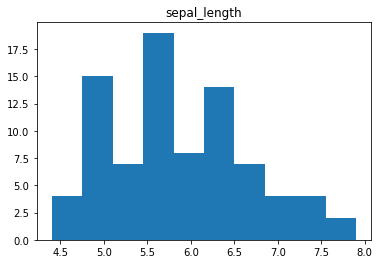

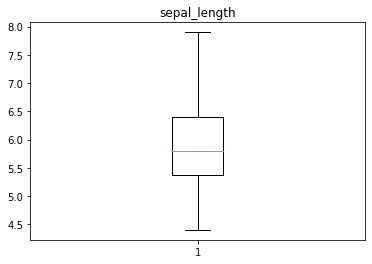

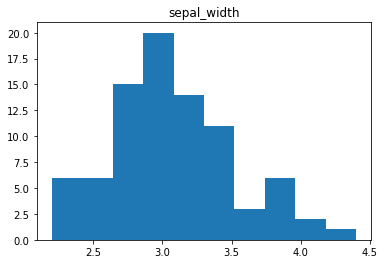

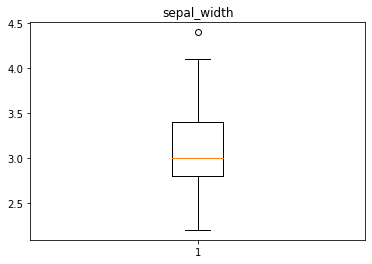

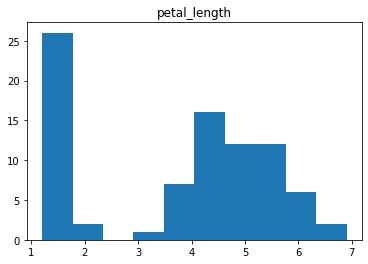

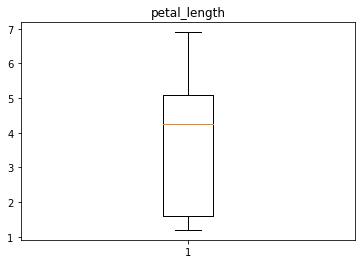

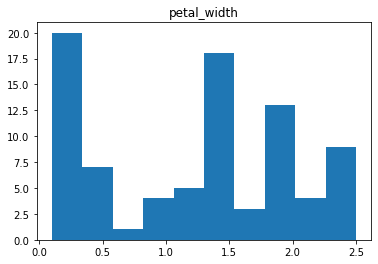

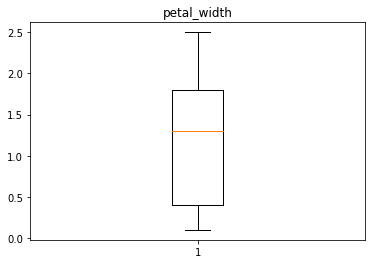

<Figure size 432x288 with 0 Axes>

In [381]:
quantitatives = train.columns[[train[col].dtype == 'float64' for col in train.columns]]
for col in quantitatives:
    plt.hist(train[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train[col])
    plt.title(col)
    plt.show();

In [382]:
for col in quantitatives:
    print(train[col].describe())
    print('---------------------')

count    84.000000
mean      5.870238
std       0.769099
min       4.400000
25%       5.375000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64
---------------------
count    84.000000
mean      3.075000
std       0.448256
min       2.200000
25%       2.800000
50%       3.000000
75%       3.400000
max       4.400000
Name: sepal_width, dtype: float64
---------------------
count    84.000000
mean      3.771429
std       1.734940
min       1.200000
25%       1.600000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64
---------------------
count    84.000000
mean      1.203571
std       0.752577
min       0.100000
25%       0.400000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64
---------------------


For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [383]:
categoricals = train.select_dtypes(include = 'object')
categoricals.value_counts()

species_name
setosa          28
versicolor      28
virginica       28
dtype: int64

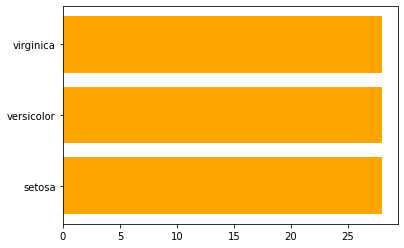

In [384]:
species = ['setosa', 'versicolor', 'virginica']
s_count = [28, 28,28]
plt.barh(species, s_count, color = 'orange');

Document takeaways & any actions.

3. Bivariate Stats

Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

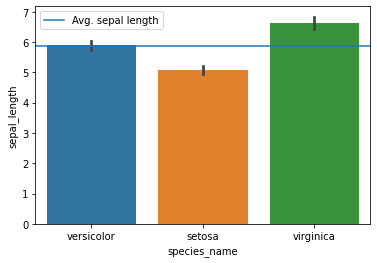

In [385]:
plt.title('')
sns.barplot(x = "species_name", y = "sepal_length", data = train)
sepal_length_mean = train.sepal_length.mean()
plt.axhline(sepal_length_mean, label = "Avg. sepal length")
plt.legend()
plt.show()

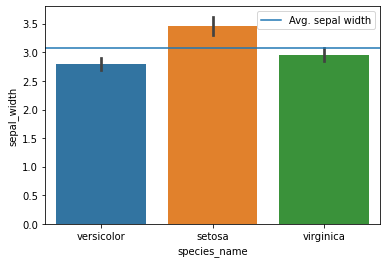

In [386]:
plt.title('')
sns.barplot(x = "species_name", y = "sepal_width", data = train)
sepal_width_mean = train.sepal_width.mean()
plt.axhline(sepal_width_mean, label = "Avg. sepal width")
plt.legend()
plt.show()

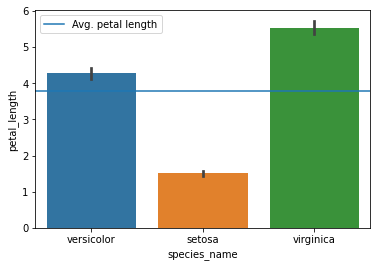

In [387]:
plt.title('')
sns.barplot(x = "species_name", y = "petal_length", data = train)
petal_length_mean = train.petal_length.mean()
plt.axhline(petal_length_mean, label = "Avg. petal length")
plt.legend()
plt.show()

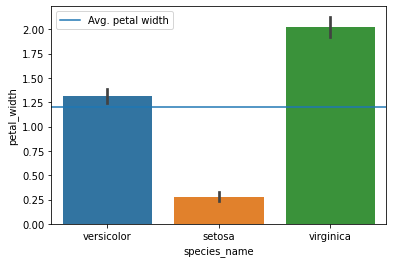

In [388]:
plt.title('')
sns.barplot(x = "species_name", y = "petal_width", data = train)
petal_width_mean = train.petal_width.mean()
plt.axhline(petal_width_mean, label = "Avg. petal width")
plt.legend()
plt.show()

For each measurement type, compute the descriptive statistics for each species.

In [389]:
print('versicolor', train[train['species_name'] == 'versicolor'].describe())
print('----------------------------------')
print('setosa', train[train['species_name'] == 'setosa'].describe())
print('----------------------------------')
print('virginica', train[train['species_name'] == 'virginica'].describe())

versicolor        sepal_length  sepal_width  petal_length  petal_width
count     28.000000    28.000000     28.000000    28.000000
mean       5.896429     2.796429      4.271429     1.314286
std        0.425556     0.280848      0.409930     0.199470
min        4.900000     2.300000      3.300000     1.000000
25%        5.600000     2.600000      4.000000     1.200000
50%        5.800000     2.800000      4.250000     1.300000
75%        6.125000     3.000000      4.525000     1.500000
max        6.900000     3.400000      5.100000     1.800000
----------------------------------
setosa        sepal_length  sepal_width  petal_length  petal_width
count     28.000000    28.000000     28.000000     28.00000
mean       5.089286     3.467857      1.507143      0.27500
std        0.360390     0.427788      0.184448      0.12057
min        4.400000     2.300000      1.200000      0.10000
25%        4.875000     3.275000      1.400000      0.20000
50%        5.000000     3.400000      1.500000 

For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [390]:
# comparing petal width of virginica and versicolor
alpha = 0.05

null = 'the mean petal width of species virginica is less than or equal to the mean petal width of species versicolor'
alt = 'the mean petal width of species virginica is greater than the mean petal width of species versicolor'

t, p = stats.mannwhitneyu(train[train['species_name'] == 'virginica'].petal_width, train[train['species_name'] == 'versicolor'].petal_width, alternative = 'greater')

In [391]:
if p < alpha:
    print("We find evidence to reject the null hypothesis that", null)
    print("We find evidence evidence to move forward with the understanding that", alt)
else:
    print("We fail to reject the null hypothesis")
    print("There is no evidence that", null)

We find evidence to reject the null hypothesis that the mean petal width of species virginica is less than or equal to the mean petal width of species versicolor
We find evidence evidence to move forward with the understanding that the mean petal width of species virginica is greater than the mean petal width of species versicolor


In [392]:
# comparing petal length of virginica and versicolor
alpha = 0.05

null = 'the mean petal length of species virginica is less than or equal to the mean petal length of species versicolor'
alt = 'the mean petal length of species virginica is greater than the mean petal length of species versicolor'

t, p = stats.mannwhitneyu(train[train['species_name'] == 'virginica'].petal_length, train[train['species_name'] == 'versicolor'].petal_length, alternative = 'greater')

In [393]:
if p < alpha:
    print("We find evidence to reject the null hypothesis that", null)
    print("We find evidence evidence to move forward with the understanding that", alt)
else:
    print("We fail to reject the null hypothesis")
    print("There is no evidence that", null)

We find evidence to reject the null hypothesis that the mean petal length of species virginica is less than or equal to the mean petal length of species versicolor
We find evidence evidence to move forward with the understanding that the mean petal length of species virginica is greater than the mean petal length of species versicolor


In [394]:
# comparing sepal width of virginica and versicolor
alpha = 0.05

null = 'the mean sepal width of species virginica is less than or equal to the mean sepal width of species versicolor'
alt = 'the mean sepal width of species virginica is greater than the mean sepal width of species versicolor'

t, p = stats.mannwhitneyu(train[train['species_name'] == 'virginica'].sepal_width, train[train['species_name'] == 'versicolor'].sepal_width, alternative = 'greater')

In [395]:
if p < alpha:
    print("We find evidence to reject the null hypothesis that", null)
    print("We find evidence evidence to move forward with the understanding that", alt)
else:
    print("We fail to reject the null hypothesis")
    print("There is no evidence that", null)

We find evidence to reject the null hypothesis that the mean sepal width of species virginica is less than or equal to the mean sepal width of species versicolor
We find evidence evidence to move forward with the understanding that the mean sepal width of species virginica is greater than the mean sepal width of species versicolor


In [396]:
# comparing sepal length of virginica and versicolor
alpha = 0.05

null = 'the mean sepal length of species virginica is less than or equal to the mean sepal length of species versicolor'
alt = 'the mean sepal length of species virginica is greater than the mean sepal length of species versicolor'

t, p = stats.mannwhitneyu(train[train['species_name'] == 'virginica'].sepal_length, train[train['species_name'] == 'versicolor'].sepal_length, alternative = 'greater')

In [397]:
if p < alpha:
    print("We find evidence to reject the null hypothesis that", null)
    print("We find evidence evidence to move forward with the understanding that", alt)
else:
    print("We fail to reject the null hypothesis")
    print("There is no evidence that", null)

We find evidence to reject the null hypothesis that the mean sepal length of species virginica is less than or equal to the mean sepal length of species versicolor
We find evidence evidence to move forward with the understanding that the mean sepal length of species virginica is greater than the mean sepal length of species versicolor


Document takeaways & any actions.

4. Multivariate Stats

Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

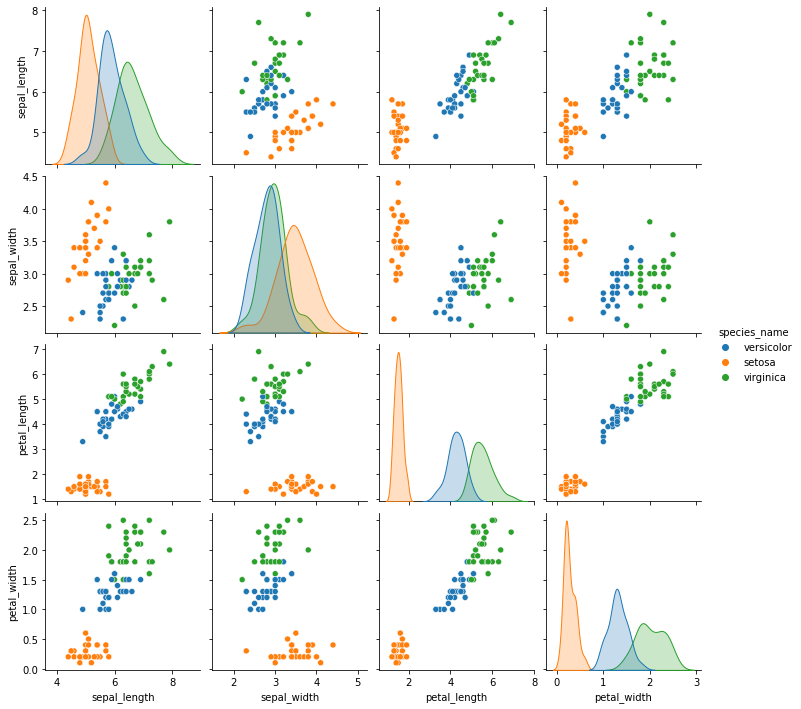

In [398]:
sns.pairplot(data = train, hue = 'species_name')
plt.show();

Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col

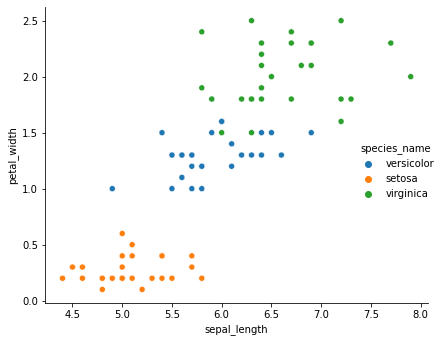

In [399]:
rel = sns.relplot(x = 'sepal_length', y = 'petal_width', data=train, hue="species_name")
rel.fig.suptitle('') # One way to title a relplot
plt.tight_layout();

Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

Is the area of the species significantly different?

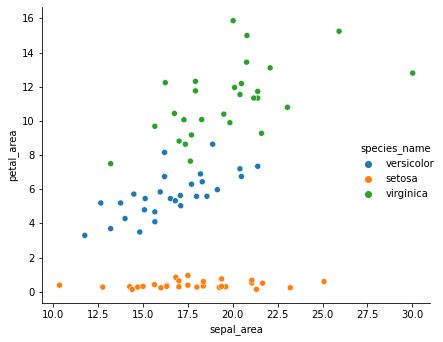

In [400]:
n_train = train
n_train['sepal_area'] = train.sepal_length * train.sepal_width
n_train['petal_area'] = train.petal_length * train.petal_width
rel = sns.relplot(x = 'sepal_area', y = 'petal_area', data = n_train, hue = "species_name")
rel.fig.suptitle('') # One way to title a relplot
plt.tight_layout()

In [408]:
train.corr()

,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
sepal_length,1.000000,-0.154904,0.867976,0.824691,0.619853,0.860498
sepal_width,-0.154904,1.000000,-0.476228,-0.403306,0.673554,-0.341702
petal_length,0.867976,-0.476228,1.000000,0.957345,0.271618,0.953510
petal_width,0.824691,-0.403306,0.957345,1.000000,0.299920,0.982404
sepal_area,0.619853,0.673554,0.271618,0.299920,1.000000,0.373870
petal_area,0.860498,-0.341702,0.953510,0.982404,0.373870,1.000000


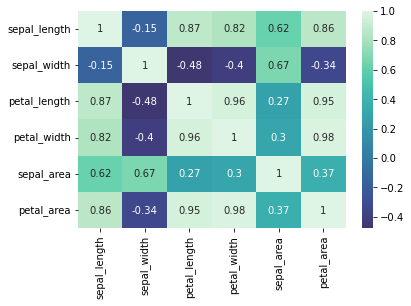

In [406]:
sns.heatmap(train.corr(), cmap = 'mako', center = 0, annot = True)
plt.show();